# Analysis of DNA-MERFISH for CTP11

by Pu Zheng

2022.02.15

analysis for dataset:

\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303

This data is DNA of uncleared MERFISH RNA:
    \\10.245.74.158\Chromatin_NAS_0\20220303-P_brain_M1_nonclear_adaptor


In [8]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

49540


# 0. fov parameters

In [2]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)
reload(get_img_info)
reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303',
             'save_folder':r'\\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303',
             'experiment_type': 'DNA',
             'num_threads': 25,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':10,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

# 1. Process Fov

In [3]:
_overwrite = False
_save_images = True
#sel_fov_ids = np.arange(0, 10) # test dataset save image
sel_fov_ids = [5]

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 47
- Number of field of views: 158
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33U1', 'H34U2', 'H35U3', 'H36U4', 'H37U5', 'H38U6', 'H39U7', 'H40U8', 'H41U9', 'H42U10', 'H43U11', 'H44U12', 'H45U13', 'H46U14'])
- 47 folders are found according to color-usage annotation.
+ loading fov_info from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_005.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 7.285s.
+ lo

In [4]:
with h5py.File(fov.save_filename, 'r') as _f:
    _grp = _f.require_group('combo')
    sel_inds = [66]
    sel_ims = []
    sel_raw_spots = []
    #
    for _ind in sel_inds:   
        sel_ims.append(_grp['ims'][_ind])
        sel_raw_spots.append(_grp['raw_spots'][_ind])

<IPython.core.display.Javascript object>


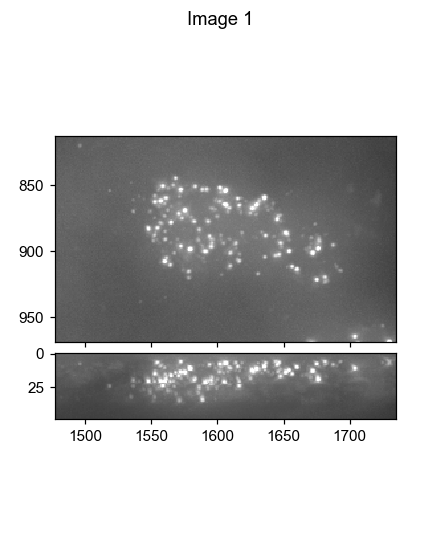

In [7]:
ia.visual_tools.imshow_mark_3d_v2(sel_ims, min_max_default=[2000,15000])

In [ ]:
_overwrite = False
_save_images = False
#sel_fov_ids = np.arange(10, 50) # batch1, not saving images
sel_fov_ids = np.arange(34, 50) # batch1, not saving images
bad_fov_ids = [23]

for _fov_id in sel_fov_ids:
    
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False, # whether overwrite
                                              )
    
    # 2. Process image into candidate spots
    fov.parallel = True
    fov.combo_ref_id = 0
    fov._process_image_to_spots('combo', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=False, 
                                _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite,
                                _verbose=True)
    # 3. Process image into candidate spots
    fov.unique_ref_id = 0
    fov._process_image_to_spots('unique', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images, _warp_images=False, _verbose=True)
    # 4. Process DAPI image
    fov._load_dapi_image()

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 47
- Number of field of views: 158
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_1\20220307-P_brain_CTP11_from_0303\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C26', 'H26C27', 'H27C28', 'H28C29', 'H29C30', 'H30C31', 'H31C32', 'H32C33', 'H33U1', 'H34U2', 'H35U3', 'H36U4', 'H37U5', 'H38U6', 'H39U7', 'H40U8', 'H41U9', 'H42U10', 'H43U11', 'H44U12', 'H45U13', 'H46U14'])
- 47 folders are found according to color-usage annotation.
+ loading fov_info from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_034.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 9.968s.
+ lo

- 47 folders are found according to color-usage annotation.
+ loading fov_info from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_036.hdf5
++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 14.602s.
+ loading correction from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_036.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_036.hdf5
++ base attributes loaded:[] in 0.026s.
-- folders not selected, allow processing all 47 folders
-- checking combo, region:[ 1  2 67] in 0.057s.
-- checking combo, region:[ 3  4 68] in 0.047s.
-- checking combo, region:[ 5  6 69] in 0.066s.
-- checking combo, re

++ base attributes loaded:['combo_ref_im', 'dapi_im', 'unique_ref_im'] in 10.738s.
+ loading correction from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_038.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_038.hdf5
++ base attributes loaded:[] in 0.021s.
-- folders not selected, allow processing all 47 folders
-- checking combo, region:[ 1  2 67] in 0.061s.
-- checking combo, region:[ 3  4 68] in 0.039s.
-- checking combo, region:[ 5  6 69] in 0.038s.
-- checking combo, region:[ 7  8 70] in 0.048s.
-- checking combo, region:[ 9 10 71] in 0.044s.
-- checking combo, region:[11 12 72] in 0.037s.
-- checking combo, region:[13 14 73] in 0.038s.
-

++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_040.hdf5
++ base attributes loaded:[] in 0.022s.
-- folders not selected, allow processing all 47 folders
-- checking combo, region:[ 1  2 67] in 0.065s.
-- checking combo, region:[ 3  4 68] in 0.040s.
-- checking combo, region:[ 5  6 69] in 0.039s.
-- checking combo, region:[ 7  8 70] in 0.050s.
-- checking combo, region:[ 9 10 71] in 0.048s.
-- checking combo, region:[11 12 72] in 0.040s.
-- checking combo, region:[13 14 73] in 0.042s.
-- checking combo, region:[15 16 74] in 0.051s.
-- checking combo, region:[17 18 75] in 0.040s.
-- checking combo, region:[19 20 76] in 0.040s.
-- checking combo, region:[21 22 77] in 0.053s.
-- che

++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_042.hdf5
++ base attributes loaded:[] in 0.022s.
-- folders not selected, allow processing all 47 folders
-- checking combo, region:[ 1  2 67] in 0.075s.
-- checking combo, region:[ 3  4 68] in 0.041s.
-- checking combo, region:[ 5  6 69] in 0.040s.
-- checking combo, region:[ 7  8 70] in 0.051s.
-- checking combo, region:[ 9 10 71] in 0.048s.
-- checking combo, region:[11 12 72] in 0.039s.
-- checking combo, region:[13 14 73] in 0.038s.
-- checking combo, region:[15 16 74] in 0.049s.
-- checking combo, region:[17 18 75] in 0.037s.
-- checking combo, region:[19 20 76] in 0.038s.
-- checking combo, region:[21 22 77] in 0.052s.
-- checking combo, region:[23 24 78] in 0.050s.
-- checking com

++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: \\mendel\Mendel_SSD4\Pu_Temp\20220307-P_brain_CTP11_from_0303\Conv_zscan_044.hdf5
++ base attributes loaded:[] in 0.023s.
-- folders not selected, allow processing all 47 folders
-- checking combo, region:[ 1  2 67] in 0.068s.
-- checking combo, region:[ 3  4 68] in 0.039s.
-- checking combo, region:[ 5  6 69] in 0.039s.
-- checking combo, region:[ 7  8 70] in 0.048s.
-- checking combo, region:[ 9 10 71] in 0.049s.
-- checking combo, region:[11 12 72] in 0.039s.
-- checking combo, region:[13 14 73] in 0.039s.
-- checking combo, region:[15 16 74] in 0.048s.
-- checking combo, region:[17 18 75] in 0.039s.
-- checking combo, region:[19 20 76] in 0.039s.
-- checking combo, region:[21 22 77] in 0.049s.
-- che